In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
H = 8.5000 #atmospheric scale height
rho_0 = 1.225 #kg*m^3, standard density at sea level

In [3]:
def model(y,t,k):
    v,m,h=y
    K,sigma,z=k
    v_dot = - K*rho_0*np.exp(-h/H)*m**(-1/3.)*v**2. #km/s^2
    m_dot = - K*sigma*m**(2/3.)* v**3. #kg/s
    h_dot = - np.cos(z*np.pi/180.)*v #km/s
    
    return [v_dot, m_dot, h_dot]

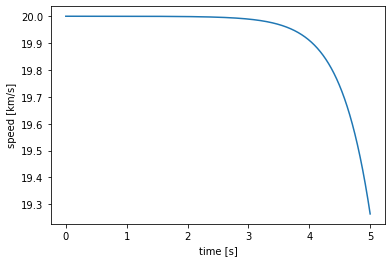

In [63]:
y0=[20, 1, 100] #velocity, mass, altitude
t=np.linspace(0,5,50000)
k=[0.01,0.003,30] #K, sigma, z_0 (in degrees)
y = odeint(model,y0,t, args=(k,))
plt.plot(t,y.T[0])
plt.xlabel("time [s]")
plt.ylabel("speed [km/s]")
plt.show()